**United Airlines Round 3 interview: Analyst TO Analyst case Study**

**Submission By: Aneri Shah**

**Date: 02/22/2021**



**Data cleaning**

In [ ]:
# Read and store data from a txt file in a dataframe

import pandas as pd
df = pd.read_csv('survey_data.txt', sep="\t")

In [ ]:
# Drop these columns based on missing values and peforming exploratory analysis by identifying several insignificant variables

df.drop(['IDATE','IDAY','SEQNO','_PSU','LADULT','COLGHOUS','STATERES','POORHLTH','CHILDREN','EDUCA','INCOME2','WEIGHT2','HEIGHT3','SMOKE100','SMOKDAY2','STOPSMK2','LASTSMK2','USENOW3',
'ALCDAY5','AVEDRNK2','DRNK3GE5','MAXDRNKS','FLUSHOT6','FLSHTMY2','PNEUVAC3','SHINGLE2','FALL12MN','FALLINJ2','SEATBELT','DRNKDRI2','HADMAM',
'HOWLONG','PROFEXAM','LENGEXAM','HADPAP2','LASTPAP2','HADHYST2','PCPSADI1','PCPSARE1','PSATEST1','PSATIME','PCPSARS1','BLDSTOOL','LSTBLDS3',
'HADSIGM3','HADSGCO1','LASTSIG3','FEETCHK2','PAINACT2','QLMENTL2','QLSTRES2','QLHLTH2','MEDICARE','DLYOTHER','NOCOV121','LSTCOVRG','DRVISITS',
'ASBIALCH','ASBIDRNK','ASBIBING','ASBIADVC','ASBIRDUC','ASTHMAGE','ASATTACK','ASERVIST','ASDRVIST','ASRCHKUP','ASACTLIM','ASYMPTOM','ASNOSLEP',
'ASTHMED3','ASINHALR','IMFVPLAC','TETANUS','HPVTEST','HPLSTTST','HPVADVC2','HPVADSHT','CNCRDIFF','CNCRAGE','CNCRTYP1','CSRVTRT1','CSRVDOC1','CSRVSUM',
'CSRVRTRN','CSRVINST','CSRVINSR','CSRVDEIN','CSRVCLIN','CSRVPAIN','CSRVCTL1','RRCLASS2','RRCOGNT2','RRATWRK2','RRHCARE3','RRPHYSM2','RREMTSM2',
'SCNTMNY1','SCNTMEL1','SCNTPAID','SCNTWRK1','SCNTLPAD','SCNTLWK1','SCNTVOT1','QSTLANG','_STSTR','_STRWT',
'_RAWRAKE','_WT2RAKE','RENTHOM1','_CPRACE','_CRACE1','_LTASTH1','_CASTHM1','_PRACE1','_MRACE1','_HISPANC','_RACEG21','_RACEGR3','_RACE','_AGE65YR',
'_AGEG5YR','HTIN4','_BMI5','_RFBMI5','_CHLDCNT','_EDUCAG','_RFSMOK3','DROCDY3_','_DRNKDY4','_RFBING5','_RFDRMN4','_RFDRWM4','_DRNKMO4',
'_RFSEAT3','_MAM502Y','_RFSIGM2','_RFBLDS2','_RFSIGM2','CTELENUM','NUMADULT','GENHLTH','WTCHSALT','LONGWTCH','DRADVISE','EMTSUPRT','LSATISFY','RCSBRAC1','RCSRACE1','RCHISLA1','RCSBIRTH'],axis=1,inplace=True)

In [ ]:
# There is anothercolumn named PREGNANT, which can be eliminated by just creating one more factor value which will be called Female_Pregnant

df.loc[df.PREGNANT == 2, 'SEX'] = "3"

In [ ]:
# Dropping these variables again based on the imputed variables or missing values

df.drop(['HLTHPLN1','EXERANY2','ASTHMA3','ASTHNOW','LASTDEN3','RMVTETH3','MARITAL','EMPLOY1','NUMPHON2','PREGNANT','QLACTLM2','PCPSAAD2','HIVTST6',
'HIVTSTD3','WHRTST10','BLDSUGAR','PDIABTST','PREDIAB1','PREDIAB1','DOCTDIAB','CHKHEMO3','FEETCHK','EYEEXAM','DIABEYE','DIABEDU','MEDCOST',
'CARERCVD','MEDBILL1','SXORIENT','TRNSGNDR','RCSGENDR','RCSRLTN2','CASTHDX2','CASTHNO2','QSTVER','MSCODE'],axis=1,inplace=True)

In [ ]:
# Filling up the missing values with 0 for better future analytics

df.fillna(value = 0,inplace = True)

In [ ]:
# Replacing None, Not Sure, Refused or missing values with 0 again to compute a new variable called TOT_DFFCLTY_TSKS
# This variable will tell if a person has difficulty in performing how many of these tasks

df["DECIDE"] = df["DECIDE"].replace([2, 7, 9], 0)
df["DIFFWALK"] = df["DIFFWALK"].replace([2, 7, 9], 0)
df["DIFFDRES"] = df["DIFFDRES"].replace([2, 7, 9], 0)
df["DIFFALON"] = df["DIFFALON"].replace([2, 7, 9], 0)
df["BLIND"] = df["BLIND"].replace([2, 7, 9], 0)
df["USEEQUIP"] = df["USEEQUIP"].replace([2, 7, 9], 0)

In [ ]:
# Creating variable TOT_DFFCLTY_TSKS and dropping the columns used to create this variable

df["TOT_DFFCLTY_TSKS"] = df["DECIDE"]+df["DIFFWALK"]+df["DIFFDRES"]+df["DIFFALON"]+df["BLIND"]+df["USEEQUIP"]
df['TOT_DFFCLTY_TSKS'].fillna(0, inplace=True)
df.drop(['DECIDE','DIFFWALK','DIFFDRES','DIFFALON','BLIND','USEEQUIP'],axis=1,inplace=True)

In [ ]:
# Replacing None, Not Sure, Refused or missing values with 0 again to compute a new variable called TOT_CHRNC
# This variable will tell how many chronic diseases a person has
# And eliminating the variables used to create this new variable

df["CVDINFR4"] = df["CVDINFR4"].replace([2, 7, 9], 0)
df["CVDCRHD4"] = df["CVDCRHD4"].replace([2, 7, 9], 0)
df["CVDSTRK3"] = df["CVDSTRK3"].replace([2, 7, 9], 0)
df["CHCSCNCR"] = df["CHCSCNCR"].replace([2, 7, 9], 0)
df["CHCOCNCR"] = df["CHCOCNCR"].replace([2, 7, 9], 0)
df["CHCCOPD1"] = df["CHCCOPD1"].replace([2, 7, 9], 0)
df["HAVARTH3"] = df["HAVARTH3"].replace([2, 7, 9], 0)
df["ADDEPEV2"] = df["ADDEPEV2"].replace([2, 7, 9], 0)
df["CHCKIDNY"] = df["CHCKIDNY"].replace([2, 7, 9], 0)
df["DIABETE3"] = df["DIABETE3"].replace([3, 4,7, 9], 0)
df["DIABETE3"] = df["DIABETE3"].replace([2], 1)
df["TOT_CHRNC"] = df["CVDINFR4"]+df["CVDCRHD4"]+df["CVDSTRK3"] +df["CHCSCNCR"]+df["CHCOCNCR"]+df["CHCCOPD1"]+df["HAVARTH3"]+df["ADDEPEV2"]+df["CHCKIDNY"]+df["DIABETE3"]
df["TOT_CHRNC"].fillna(0, inplace=True)
df.drop(['CVDINFR4','CVDCRHD4','CVDSTRK3','CHCSCNCR','CHCOCNCR','CHCCOPD1','HAVARTH3','ADDEPEV2','CHCKIDNY','DIABETE3'],axis=1,inplace=True)
df.drop(['_IMPCSEX','_IMPCRAC','_IMPCAGE','_HCVU651','DIABAGE2','FMONTH','_IMPRACE'],axis=1,inplace=True)

In [ ]:
# Replacing Not Sure, Refused or missing values with 0 to reduce the number of values for creating categorical variables

df["NUMMEN"] = df["NUMMEN"].replace([1,2,3],1)
df["NUMMEN"] = df["NUMMEN"].replace([4,5,15],2)
df["NUMWOMEN"] = df["NUMWOMEN"].replace([1,2,3],1)
df["NUMWOMEN"] = df["NUMWOMEN"].replace([4,5],2)
df['PERSDOC2'] = df['PERSDOC2'].replace([4,5,15],2)
df["PHYSHLTH"] = df["PHYSHLTH"].replace([77,88,99], 0)
df["MENTHLTH"] = df["MENTHLTH"].replace([77,88,99], 0)
df["PERSDOC2"] = df["PERSDOC2"].replace([3,7,9], 0)
df["CHECKUP1"] = df["CHECKUP1"].replace([7,8,9], 0)
df["CHECKUP1"] = df["CHECKUP1"].replace([2,3], 2)
df["SLEPTIM1"] = df["SLEPTIM1"].replace([77,99], 0)
df["VETERAN3"] = df["VETERAN3"].replace([2,7,9], 0)
df["NUMHHOL2"] = df["NUMHHOL2"].replace([2,7,9], 0)
df["CPDEMO1"] = df["CPDEMO1"].replace([2,7,9], 0)
df["INTERNET"] = df["INTERNET"].replace([2,7,9], 0)
df["INSULIN"] = df["INSULIN"].replace([2,9], 0)
df["HLTHCVR1"] = df["HLTHCVR1"].replace([77,99], 0)
df["DELAYMED"] = df["DELAYMED"].replace([7,9], 0)
df["MEDSCOST"] = df["MEDSCOST"].replace([3,7,9], 0)
df["_CHISPNC"] = df["_CHISPNC"].replace([9], 0)
df["_ASTHMS1"] = df["_ASTHMS1"].replace([9], 0)
df["_ALTETH2"] = df["_ALTETH2"].replace([0], 9)
df["_FLSHOT6"] = df["_FLSHOT6"].replace([9], 0)
df["_PNEUMO2"] = df["_PNEUMO2"].replace([9], 0)
df["_RFMAM2Y"] = df["_RFMAM2Y"].replace([9], 0)
df["_RFPAP32"] = df["_RFPAP32"].replace([9], 0)
df["_RFPSA21"] = df["_RFPSA21"].replace([9], 0)
df["_AIDTST3"] = df["_AIDTST3"].replace([9], 0)
df["DRNKANY5"] = df["DRNKANY5"].replace([7,9],0)
df["TOT_DFFCLTY_TSKS"] = df["TOT_DFFCLTY_TSKS"].replace([1,2],1)
df["TOT_DFFCLTY_TSKS"] = df["TOT_DFFCLTY_TSKS"].replace([3,4],2)
df["TOT_DFFCLTY_TSKS"] = df["TOT_DFFCLTY_TSKS"].replace([5,6],3)
df['TOT_CHRNC'] = df['TOT_CHRNC'].replace([1,2,3],1)
df['TOT_CHRNC'] = df['TOT_CHRNC'].replace([4,5,6],2)
df['TOT_CHRNC'] = df['TOT_CHRNC'].replace([7,8,9,10],3)

In [ ]:
# Converting the following variables to categories

df['_STATE'] = df['_STATE'].astype('category')
df['IMONTH'] = df['IMONTH'].astype('category')
df['IYEAR'] = df['IYEAR'].astype('category')
df['DISPCODE'] = df['DISPCODE'].astype('category')
df['PVTRESD1'] = df['PVTRESD1'].astype('category')
df['PERSDOC2'] = df['PERSDOC2'].astype('category')
df['CHECKUP1'] = df['CHECKUP1'].astype('category')
df['VETERAN3'] = df['VETERAN3'].astype('category')
df['NUMHHOL2'] = df['NUMHHOL2'].astype('category')
df['CPDEMO1'] = df['CPDEMO1'].astype('category')
df['INTERNET'] = df['INTERNET'].astype('category')
df['SEX'] = df['SEX'].astype('category')
df['INSULIN'] = df['INSULIN'].astype('category')
df['HLTHCVR1'] = df['HLTHCVR1'].astype('category')
df['DELAYMED'] = df['DELAYMED'].astype('category')
df['MEDSCOST'] = df['MEDSCOST'].astype('category')
df['_IMPNPH'] = df['_IMPNPH'].astype('category')
df['_CHISPNC'] = df['_CHISPNC'].astype('category')
df['_RFHLTH'] = df['_RFHLTH'].astype('category')
df['_TOTINDA'] = df['_TOTINDA'].astype('category')
df['_ASTHMS1'] = df['_ASTHMS1'].astype('category')
df['_DRDXAR1'] = df['_DRDXAR1'].astype('category')
df['_EXTETH2'] = df['_EXTETH2'].astype('category')
df['_ALTETH2'] = df['_ALTETH2'].astype('category')
df['_DENVST2'] = df['_DENVST2'].astype('category')
df['_RACE_G1'] = df['_RACE_G1'].astype('category')
df['_AGE_G'] = df['_AGE_G'].astype('category')
df['_BMI5CAT'] = df['_BMI5CAT'].astype('category')
df['_INCOMG'] = df['_INCOMG'].astype('category')
df['_SMOKER3'] = df['_SMOKER3'].astype('category')
df['DRNKANY5'] = df['DRNKANY5'].astype('category')
df['_RFDRHV4'] = df['_RFDRHV4'].astype('category')
df['_FLSHOT6'] = df['_FLSHOT6'].astype('category')
df['_PNEUMO2'] = df['_PNEUMO2'].astype('category')
df['_RFSEAT2'] = df['_RFSEAT2'].astype('category')
df['_RFMAM2Y'] = df['_RFMAM2Y'].astype('category')
df['_RFPAP32'] = df['_RFPAP32'].astype('category')
df['_RFPSA21'] = df['_RFPSA21'].astype('category')
df['_AIDTST3'] = df['_AIDTST3'].astype('category')
df['_IMPEDUC'] = df['_IMPEDUC'].astype('category')
df['_IMPMRTL'] = df['_IMPMRTL'].astype('category')
df['_IMPHOME'] = df['_IMPHOME'].astype('category')
df['TOT_DFFCLTY_TSKS'] = df['TOT_DFFCLTY_TSKS'].astype('category')
df['TOT_CHRNC'] = df['TOT_CHRNC'].astype('category')
df['NUMMEN'] = df['NUMMEN'].astype('category')
df['NUMWOMEN'] = df['NUMWOMEN'].astype('category')

In [ ]:
# Naming the categories for better representation during analytics

df._STATE.cat.categories = ["Connecticut","New Jersey","New York"]
df.PVTRESD1.cat.categories = ["Missing","Yes","No"]
df.PERSDOC2.cat.categories = ["No_Not_Sure","Yes_One","Yes_more_than_one"]
df.CHECKUP1.cat.categories = ["No_Not_Sure","1_year","2_to_5_years","5years_or_more"]
df.VETERAN3.cat.categories = ["No_Not_Sure","Yes"]
df.NUMHHOL2.cat.categories = ["No_Not_Sure","Yes"]
df.CPDEMO1.cat.categories = ["No_Not_Sure","Yes"]
df.INTERNET.cat.categories = ["No_Not_Sure","Yes"]
df.SEX.cat.categories = ["Male","Female","Pregnant_Female"]
df.INSULIN.cat.categories = ["No_Not_Sure","Yes"]
df.HLTHCVR1.cat.categories = ["Not_sure_or_missing","Employer_or_Union","Bought_on_your_own","Medicare","Medicaid","Tricare","Alaska_Native","Other_Source","None"]
df.DELAYMED.cat.categories = ["Not_sure_or_missing","Not_Telephone","Appntmnt_not_soon","Wait_long","Office_not_open","No_transport","Other","No_Delay"]
df.MEDSCOST.cat.categories = ["Not_sure_prescribed_or_missing","Yes","No"]
df._IMPNPH.cat.categories = ["Missing","1","2","3","4","5","6"]
df._CHISPNC.cat.categories = ["Missing_or_not_sure","Yes_Hisp","No_Hisp"]
df._RFHLTH.cat.categories = ["Good_Better_Health","Fair_Poor_Health","Not_Sure_Missing"]
df._TOTINDA.cat.categories = ["Yes_PA", "No_PA","Not_sure_missing"]
df._ASTHMS1.cat.categories = ["Not_Sure_Missing","Current","Former","Never"]
df._DRDXAR1.cat.categories = ["Missing","Yes_Arth","No_Arth"]
df._EXTETH2.cat.categories = ["No_Risk_Teeth","Risk_Teeth","Not_Sure_Missing"]
df._ALTETH2.cat.categories = ["NoT_Extracted","Yes_Extracted","Not_sure_missing"]
df._DENVST2.cat.categories = ["Yes_Visit_Dentst","No_Visit_Dentst","Not_Sure_Missing"]
df._RACE_G1.cat.categories = ["Not_Sure_Missing","White_NH","Black_NH","Hisp","Other_NH","Multi_Race_NH"]
df._AGE_G.cat.categories = ["Age_18_24","Age_25_34","Age_35_44","Age_45_54","Age_55_64","Age_65_or_more"]
df._BMI5CAT.cat.categories = ["Not_Sure_Missing","Under_Weight","Normal_Weight","Over_Weight","Obese"]
df._INCOMG.cat.categories = ["Less_than_15k","15k_to_25k","25k_to_35k","35k_to_50k","50k_or_more","Not_Sure_Missing"]
df._SMOKER3.cat.categories = ["Current_Daily_Smoke","Current_Sometimes_Smoke","Former_Smoke","Never_Smoke","Not_Sure_Missing"]
df.DRNKANY5.cat.categories = ["Not_Sure_Missing","Yes","No"]
df._RFDRHV4.cat.categories = ["No","Yes","Not_Sure_Missing"]
df._FLSHOT6.cat.categories = ["Not_Sure_Missing","Yes","No"]
df._PNEUMO2.cat.categories = ["Not_Sure_Missing","Yes","No"]
df._RFSEAT2.cat.categories = ["Always","Sometimes","Not_Sure_Missing"]
df._RFMAM2Y.cat.categories = ["Not_Sure_Missing","Yes","No"]
df._RFPAP32.cat.categories = ["Not_Sure_Missing","Yes","No"]
df._RFPSA21.cat.categories = ["Not_Sure_Missing","Yes","No"]
df._AIDTST3.cat.categories = ["Not_Sure_Missing","Yes","No"]
df._IMPEDUC.cat.categories = ["No_School","Elementary","SOme_high_School","High_School_Grad","College","College_Grad"]
df._IMPMRTL.cat.categories = ["Married","Divorced","Widowed","Separated","Never_married","Mem_of_Unmarried_Couple"]
df._IMPHOME.cat.categories = ["Own","Rent","Other"]
df.TOT_DFFCLTY_TSKS.cat.categories = ["None_or_Missing","1_to_2","3_to_4","5_to_6"]
df.TOT_CHRNC.cat.categories = ["None_or_Missing","1_to_3","4_to_6","7_or_More"]
df.NUMWOMEN.cat.categories = ["None","1_to_3","4_or_more"]
df.NUMMEN.cat.categories = ["None","1_to_3","4_or_more"]

In [ ]:
# Removing the rows from PHYSHLTH having value 0 since that is the dependent variable
# Because 0 means that either the person had no bad health days/don't remember how many days/refused to answer/missing values

df_new = df[df.PHYSHLTH != 0].reset_index(drop=True)
#df.to_csv("United_data_updated.csv",header=True,index=False)

**Q1. How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Provie an indication of distribution using whatever statistics or charts you find suitable.**

In [ ]:
# Importing the libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as statsmodelsweightstats
% matplotlib inline

state = df_new["_STATE"]    # Storing the state values in a new object
physhealth = df_new["PHYSHLTH"]       # Storing the physical health values in a new object

Text(0.5, 0, 'States')

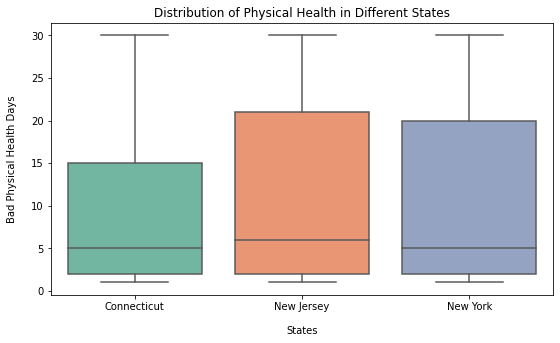

In [ ]:
# Plotting the bad physical health days for each days in a box-plot

plt.figure(figsize=(9, 5))
sns.boxplot(x=state,y=physhealth, palette="Set2",)
plt.title("Distribution of Physical Health in Different States")
plt.ylabel("Bad Physical Health Days", labelpad=14)
plt.xlabel("States", labelpad=14)

In [ ]:
# Describing mean,median,standard deviation,inter-quartile values for each state with the number of bad physical days

def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.75)
df_new.groupby('_STATE').agg({'PHYSHLTH':['count','mean','median','std','min','max',q1, q2]})

PHYSHLTH                                                   
               count       mean median        std  min   max   q1    q2
_STATE                                                                 
Connecticut     2592  10.430941    5.0  10.667561  1.0  30.0  2.0  15.0
New Jersey      4251  11.732769    6.0  11.237568  1.0  30.0  2.0  21.0
New York        2532  10.929700    5.0  10.801091  1.0  30.0  2.0  20.0

**Ans 1:**  From the plots and statistics of these variables, I can say that there is kind of some difference in the number of bad physical days for each state.

With the mean for Connecticut being the lowest with 10, followed by New York with 11 and highest for New Jersey being 12. 

Even though the difference could be because the count for New Jersey is highest with 4251 rows.

Also, the median for New Jersey is highest with median physical days being 6. Although, all 3 states have the same min,max and first quartile values. Third quartile value is different with highest in New Jersey again, followed by New York and least in Connecticut. There is a significant difference bbetween the third-quartile values of Connecticut and New Jersey or Connecticut and New York.

I think these values signify that it can be safe to state that the number of bad physical health days could differ by state.

**Q2. How do you know if the above difference between states is statistically significant?**

In [ ]:
# Performing ANOVA Test to test the significance of these 2 variables because state has more than 2 categorical levels

from scipy import stats

connecticut_info = df_new.query('_STATE == "Connecticut"')['PHYSHLTH']
new_jersey_info = df_new.query('_STATE == "New Jersey"')['PHYSHLTH']
new_york_info = df_new.query('_STATE == "New York"')['PHYSHLTH']

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(connecticut_info,new_jersey_info,new_york_info)
print('F-Statistic = %f' % (fvalue))
print('P-Value = %f' % (pvalue))

F-Statistic = 12.086743
P-Value = 0.000006


**Ans 2:** To prove my analysis, I have some significant statistics. 

ANOVA uses the F-test to determine whether the variability between group means is larger than the variability of the observations within the groups. If that ratio is sufficiently large, you can conclude that not all the means are equal. Looking at the above test results, F-Statistic value is kind of high and I can say that we can reject the null-hypothesis.

Also, p-value for the above test is way less than 0.05 and hence, I can say that we reject the null-hypothesis and state that there is a difference in the average of bad physical days for each state. 

Looking at all the analysis and tests, I can surely say that there is a difference in the number of bad physical days for each state.

**Q3. Digging deeper into the data, what are the top predictor variables impacting health(i.e., demographics, behaviours, previous illlness,etc.)?**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

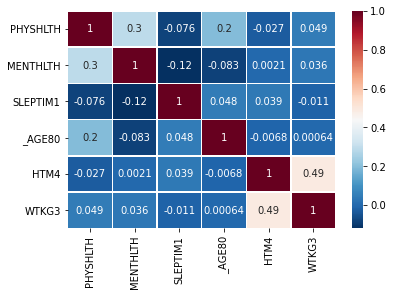

In [ ]:
# Plotting a correlation graph for numeric variables

corr = df_new.corr(method='pearson')
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
#sns.heatmap(corr)

From the correlation graph, numeric values are not very correlated, except for Height and Weight. From the 2, as per my understanding, Weight should be impactful to our data considering height cannot impact the number of bad physical days for a patient. 

Also, I can remove weight because I already have a column called _BMI5CAT which has imputed BMIs for all patients.

So, I will remove both height and weight variables from the dataframe.

In [ ]:
# Dropping Height and weight variables
df_new.drop(["HTM4","WTKG3"],axis=1,inplace=True)

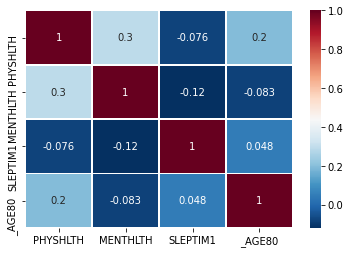

In [ ]:
# Plotting a correlation graph for numeric variables again
# No variables are correlated to each other

corr = df_new.corr(method='pearson')
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [ ]:
# Finding out significant categorical variables by performing ANOVA on all of them and removing variables who have p-values than 0.05

import scipy

categorical_data = df_new.select_dtypes(include='category')
anova_df = pd.DataFrame(columns=['Variable','F-statistic','P-value'])
insignificant_columns = []
for each in categorical_data.columns:
  result = df_new.groupby(each)['PHYSHLTH'].apply(list)
  F, p = scipy.stats.f_oneway(*result)
  anova_df.loc[len(anova_df.index)] = [each, F, p]  
  if(p>=0.05):
    insignificant_columns.append(each)

df_new.drop(insignificant_columns,axis=1,inplace=True)
anova_df

#['IYEAR', 'DISPCODE', 'NUMMEN', '_RFDRHV4', '_RFSEAT2', '_AIDTST3']

,Variable,F-statistic,P-value
0,_STATE,12.086743,5.722058e-06
1,IMONTH,2.803797,1.182481e-03
2,IYEAR,0.071276,7.894931e-01
3,DISPCODE,0.001093,9.736224e-01
4,PVTRESD1,28.845280,3.243796e-13
5,NUMMEN,1.006452,3.655530e-01
6,NUMWOMEN,5.070759,6.294889e-03
7,PERSDOC2,49.877070,2.838783e-22
8,CHECKUP1,22.542426,1.546737e-14
9,VETERAN3,27.328505,1.753607e-07


From the Linear Regression results in R, the top predictor variables are:

**_STATE:** New Jersey has 0.54 times and New York has 0.11 times chances of having higher number of bad physical days than Connecticut.

**MENTHLTH:** With increase in 1 bad mental health day, there is an increase of 0.16 bad physical health day.

**PERSDOC2:** People having more than 1 personal doctors are 0.78 times more likely to have bad physical days compared to people having no personal doctors. Similarly, people seeing only 1 personal doctor are 0.06 times less likely to have bad physical health days.

**CHECKUP1:** People who have had their last routine check up within last 2 to 5 years are 0.27 times less likely to have bad physical health days compared to people who have their last routine check up within past 1 year. SImilarly, People who have had their last routine check up 5 or more years ago are 0.14 times and people who don't remember time of their last checkup are 2.26 more likely to have bad physical health days.

**NUMHHOL2:** People having more than 1 telephone numbers in their household are 1.8 times less likely to have bad physical days compared to people not having more than 1 telephone numbers.

**INSULIN:** People currently taking insulin are 0.88 times more likely to have bad physical days compared to people not taking them.

**_RFHLTH:** People having bad or poor general health are 6.83 times more likely to have bad physical health days compared to people having good or better general health.

**_TOTINDA:** Adults who reported to have done physical activity in the past 30 days are 0.97 times less likely to have bad physical health days compared to those who don't.

**_ASTHMS1:** Strangely, people who have reported to be have had Asthma in the past or never had it are 0.44 and 0.59 times more likely to have bad physical health days compared to those who currently have Asthma.

**_ALTETH2:** Adults aged 65+ who have had their natural teeth extracted are 0.2 times less likely to have bad physical health days compared to those who haven't.

**_RACE_G1:** Hispanics, Multi-racial Non-Hispanics, Other race Non-Hispanics and White Non-Hispanics are 0.62,1.83,0.32 and 0.99 times respectively more likely to have more bad physical health days compared to Black Non-Hispanics.

**_AGE_G:** People in the age groups 25-34, 35-44, 45-54, 55-64, and 65 or more are 0.51,0.86,1.75,2.39 and 2.42 times respectively likely to have more bad physical health days compared to age group 18-24.

**DRNKANY5:** Adults who reported to have had atleast 1 alcoholic drink in the past 30 days are 0.93 times less likely to have bad physical health days compared to people who haven't.

**_FLSHOT6:** Adults aged 65+ who has had a flu shot in the past year are 0.18 times less likely to have bad physical days compared to thoe who didn't.

**TOT_DFFCLTY_TSKS:** People who have difficulty in performing 3-4 tasks, or 5-6 tasks are 3.08 and 3.63 times respectively more likely to have bad physical health days compared to those who have difficulty in performing only 1 or 2 tasks.

**TOT_CHRNC:** People who have a total of 4-6 chronic illnesses are 0.08 times less likely, whereas people having 7 or more chronic illnesses are 0.56 times more likely to have bad physical health days compared to people who have 1 to 3 chronic illnesses.



**Q4. If you had additional time, what other types of data mining techniques and/or analytical modelling would you explore with this dataset?** 

**Ans 4:** I would have performed deeper exploratory analysis on the variables by ploting multiple graphs and charts. 
Also, I would have also tried categorizing the PHYSHLTH variable and performed analysis with categorical dependent variable to find which one is better.